!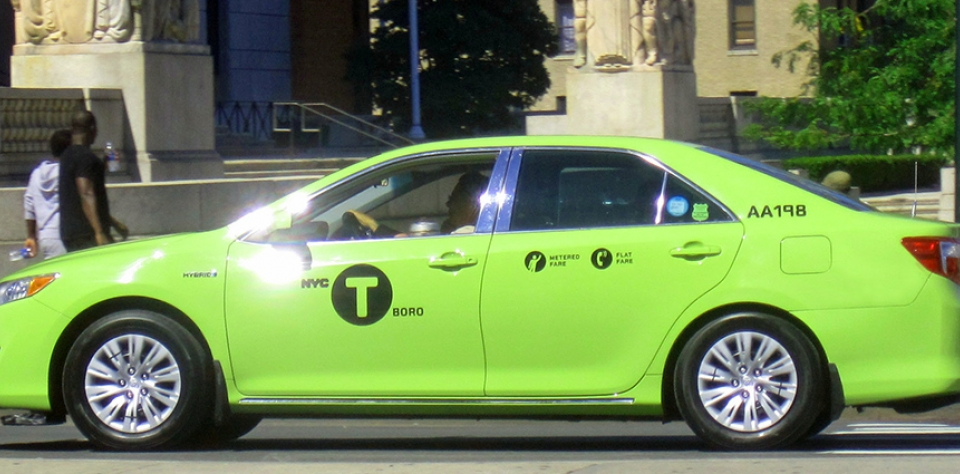

##Importing the libraries


In [ ]:
!pip install geopy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving green_tripdata_2023-10.parquet to green_tripdata_2023-10.parquet


In [ ]:
df = pd.read_parquet("green_tripdata_2023-10.parquet")

##Reading the data


In [ ]:
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-10-01 00:57:33,2023-10-01 01:07:58,N,1.0,166,74,1.0,1.45,12.1,1.0,0.5,2.92,0.0,NaN,1.0,17.52,1.0,1.0,0.00
1,2,2023-10-01 01:00:16,2023-10-01 01:06:13,N,1.0,74,42,1.0,0.89,7.9,1.0,0.5,0.00,0.0,NaN,1.0,10.40,2.0,1.0,0.00
2,2,2023-10-01 00:51:52,2023-10-01 01:00:32,N,1.0,83,129,1.0,2.38,13.5,1.0,0.5,0.00,0.0,NaN,1.0,16.00,2.0,1.0,0.00
3,2,2023-10-01 00:03:39,2023-10-01 00:11:20,N,1.0,74,263,1.0,2.26,11.4,1.0,0.5,3.33,0.0,NaN,1.0,19.98,1.0,1.0,2.75
4,2,2023-10-01 00:27:42,2023-10-01 00:39:10,N,1.0,74,236,1.0,2.14,13.5,1.0,0.5,2.81,0.0,NaN,1.0,21.56,1.0,1.0,2.75


In [ ]:
df.shape


(66177, 20)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66177 entries, 0 to 66176
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               66177 non-null  int32         
 1   lpep_pickup_datetime   66177 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  66177 non-null  datetime64[ns]
 3   store_and_fwd_flag     61500 non-null  object        
 4   RatecodeID             61500 non-null  float64       
 5   PULocationID           66177 non-null  int32         
 6   DOLocationID           66177 non-null  int32         
 7   passenger_count        61500 non-null  float64       
 8   trip_distance          66177 non-null  float64       
 9   fare_amount            66177 non-null  float64       
 10  extra                  66177 non-null  float64       
 11  mta_tax                66177 non-null  float64       
 12  tip_amount             66177 non-null  float64       
 13  t

In [ ]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4677
RatecodeID                4677
PULocationID                 0
DOLocationID                 0
passenger_count           4677
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                66177
improvement_surcharge        0
total_amount                 0
payment_type              4677
trip_type                 4678
congestion_surcharge      4677
dtype: int64

##Exploratory Data Analysis

## 3.1 convert timestamp to datetime format in order to fetch other necessary details about the trip


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [ ]:
df['pickup_datetime'].head(5)

0   2023-10-01 00:57:33
1   2023-10-01 01:00:16
2   2023-10-01 00:51:52
3   2023-10-01 00:03:39
4   2023-10-01 00:27:42
Name: pickup_datetime, dtype: datetime64[ns]

##3.2 Creating a new column to know the duration of each trip

In [ ]:
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

In [ ]:
df['duration'].tail()

66172   0 days 00:26:00
66173   0 days 00:12:00
66174   0 days 00:12:00
66175   0 days 00:11:00
66176   0 days 00:15:00
Name: duration, dtype: timedelta64[ns]

## 3.3 Converting the each taxi trip duration into minutes by applying lambda function

In [ ]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [ ]:
df['duration'].tail()

66172    26.0
66173    12.0
66174    12.0
66175    11.0
66176    15.0
Name: duration, dtype: float64

## 3.4 Calculate distance between pickup and dropoff coordinates using geodesic.

In [ ]:
distance = []
for index in df['pickup_latitude'].index:
    clear_output()
    print(index)
    distance.append(geodesic((df['pickup_latitude'].iloc[index],df['pickup_longitude'].iloc[index]),(df['dropoff_latitude'].iloc[index],df['dropoff_longitude'].iloc[index])).miles)
df['distance'] = distance

KeyError: 'pickup_latitude'

In [ ]:
from geopy.distance import geodesic

def geodesic_distance(lat1, lon1, lat2, lon2):
    # Coordinates of pickup and dropoff locations
    pickup_coords = (lat1, lon1)
    dropoff_coords = (lat2, lon2)

    # Calculate geodesic distance
    distance = geodesic(pickup_coords, dropoff_coords).kilometers

    return distance

# Example usage
pickup_lat = 40.7128
pickup_lon = -74.0060
dropoff_lat = 34.0522
dropoff_lon = -118.2437

distance = geodesic_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
print(f"The geodesic distance between pickup and dropoff is {distance} km.")


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Example usage
pickup_lat = 40.7128
pickup_lon = -74.0060
dropoff_lat = 34.0522
dropoff_lon = -118.2437

distance = haversine_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
print(f"The Haversine distance between pickup and dropoff is {distance} km.")
